# 第2章 確率・統計の基礎

In [1]:
import os
DATA_DIR = "LNPR_BOOK_CODES/sensor_data/"
os.chdir(DATA_DIR)

## 2.1 センサデータの収集とJupyter Notebook上での準備

In [2]:
import pandas as pd
data  = pd.read_csv("sensor_data_200.txt", delimiter=" ", 
                    header=None, names = ("date","time","ir","lidar"))
data

,date,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


In [3]:
print(data["lidar"][0:5])

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64


## 2.2 度数分布と確率分布

### 2.2.1 ヒストグラムの描画

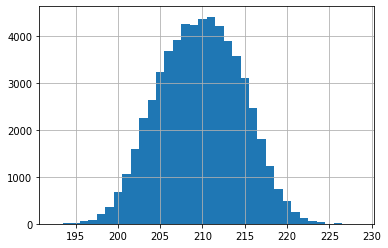

In [4]:
import matplotlib.pyplot as plt
data["lidar"].hist(bins=max(data["lidar"])-min(data["lidar"]), align="left")
plt.show()

### 2.2.3 雑音の数値化

In [5]:
mean1 = sum(data["lidar"].values)/len(data["lidar"].values)
mean2 = data["lidar"].mean()
print("素朴な方法")
print(mean1)
print("pandasのメソッド")
print(mean2)

素朴な方法
209.73713297619855
pandasのメソッド
209.73713297619855


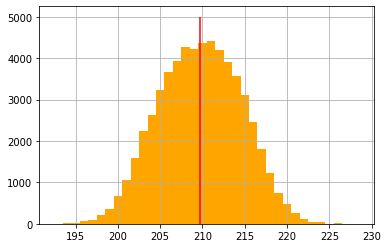

In [6]:
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),color="orange",align='left')   ###avgplot###
plt.vlines(mean1,ymin=0,ymax=5000,color="red")
plt.show()

In [7]:
# 定義から計算　                     ### calcvar
zs = data["lidar"].values  
mean = sum(zs)/len(zs)
diff_square = [ (z - mean)**2 for z in zs]

sampling_var = sum(diff_square)/(len(zs))     # 標本分散
unbiased_var = sum(diff_square)/(len(zs)-1) # 不偏分散

print("素朴な方法")
print("標本分散", sampling_var)
print("不偏分散", unbiased_var)

# Pandasを使用
pandas_sampling_var = data["lidar"].var(ddof=False) # 標本分散
pandas_default_var = data["lidar"].var()        # デフォルト（不偏分散）

print("Pandasのメソッド")
print("標本分散",pandas_sampling_var)
print("不偏分散", pandas_default_var)

# NumPyを使用
import numpy as np

numpy_default_var = np.var(data["lidar"])  # デフォルト（標本分散）
numpy_unbiased_var = np.var(data["lidar"], ddof=1)  # 不偏分散

print("Numpyのメソッド")
print("標本分散", numpy_default_var)
print("不偏分散", numpy_unbiased_var)

素朴な方法
標本分散 23.407709770274106
不偏分散 23.40810659855441
Pandasのメソッド
標本分散 23.4077097702742
不偏分散 23.408106598554504
Numpyのメソッド
標本分散 23.4077097702742
不偏分散 23.408106598554504


In [8]:
import math ###  calcstddev

# 定義から計算
stddev1 = math.sqrt(sampling_var)
stddev2 = math.sqrt(unbiased_var)

# Pandasを使用 
pandas_stddev = data["lidar"].std()

print("素朴な方法")
print("標本分散を利用", stddev1)
print("不偏分散を利用", stddev2)
print("Pandasのメソッド", pandas_stddev)

素朴な方法
標本分散を利用 4.838151482774605
不偏分散を利用 4.83819249292072
Pandasのメソッド 4.838192492920729


### 2.2.4 (素朴な)確率分布

In [9]:
freqs = pd.DataFrame(data["lidar"].value_counts())  ###freqs###
freqs.transpose() #横向きに出力

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [10]:
freqs["probs"] = freqs["lidar"]/len(data["lidar"]) ###addprobs###
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


In [11]:
sum(freqs["probs"])  ###confirmsum###

1.0

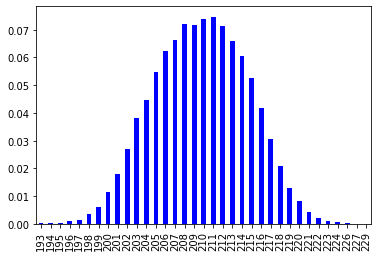

In [12]:
freqs["probs"].sort_index().plot.bar(color="blue")   ###probdist###
plt.show()

### 2.2.5 確率分布を用いたシミュレーション

In [13]:
def drawing(): #ややこしいので関数として定義  ###one_sampling###
    return freqs.sample(n=1, weights="probs").index[0]

drawing() # 実行

204

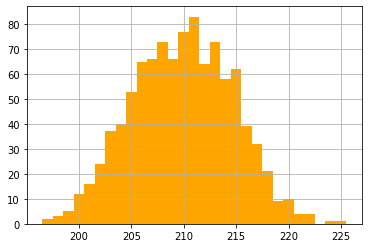

In [14]:
# samples = [ drawing() for i in range(len(data))] ### sampling_simulation ###
samples = [ drawing() for i in range(1000)] #コーディング中は1行目の代わりにこちらを使う
simulated = pd.DataFrame(samples, columns=["lidar"])
p = simulated["lidar"]
p.hist(bins = max(p) - min(p),color="orange",align='left')  
plt.show()

## 2.3 確率モデル

### 2.3.1 ガウス分布の当てはめ

In [15]:
def p(z, mu=209.7, dev=23.4):   ###pdf_from_def###
    return math.exp(-(z - mu)**2/(2*dev))/math.sqrt(2*math.pi*dev)


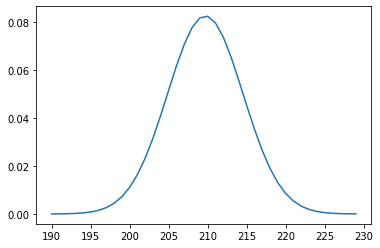

In [16]:
zs = range(190,230)   ###pdf_plot_from_def###
ys = [p(z) for z in zs]

plt.plot(zs,ys)
plt.show()

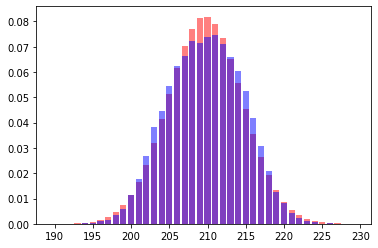

In [17]:
def prob(z,width=0.5):                                     ###prob_plot_from_def###
    return width*( p(z-width) + p(z+width) )

zs = range(190,230)
ys = [prob(z) for z in zs]

plt.bar(zs,ys, color="red", alpha=0.5) #alphaでグラフを透明にできる
f = freqs["probs"].sort_index()
plt.bar(f.index, f.values, color="blue", alpha=0.5)
plt.show()

### 2.3.2 確率密度関数

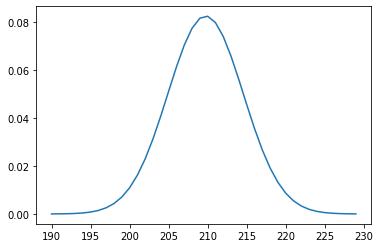

In [18]:
from scipy.stats import norm

zs = range(190, 230)
ys = [norm.pdf(z, mean1, stddev1) for z in zs]

plt.plot(zs, ys)
plt.show()

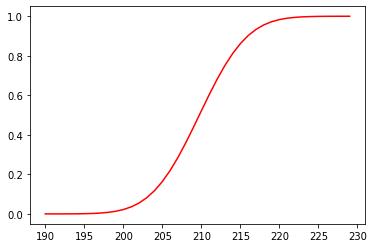

In [19]:
zs = range(190, 230)
ys = [norm.cdf(z, mean1, stddev1) for z in zs]

plt.plot(zs, ys, color="red")
plt.show()

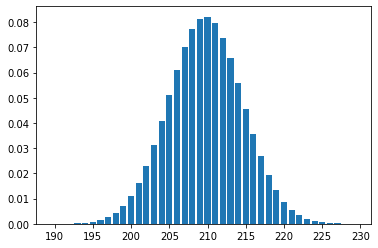

In [20]:
zs = range(190, 230)
ys = [norm.cdf(z+0.5, mean1, stddev1) - norm.cdf(z-0.5, mean1, stddev1) for z in zs]

plt.bar(zs, ys)
plt.show()

### 2.3.3 期待値

In [21]:
import random

samples = [random.choice([1,2,3,4,5,6]) for i in range(10000)]
sum(samples) / len(samples)

3.4901

## 2.4 複雑な分布

### 2.4.1 条件付き確率

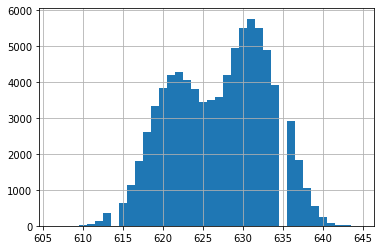

In [22]:
import pandas as pd       ###hist_600###
import matplotlib.pyplot as plt

data  = pd.read_csv("sensor_data_600.txt", delimiter=" ",
                    header=None, names = ("date","time","ir","lidar"))

data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align='left')
plt.show()

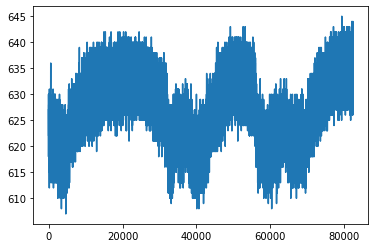

In [23]:
data.lidar.plot() ###plot_all_data##
plt.show()

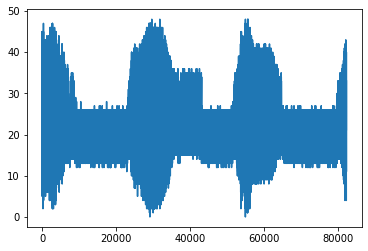

In [24]:
data.ir.plot()
plt.show()

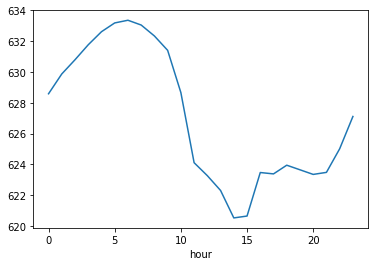

In [25]:
data["hour"] = [e//10000 for e in data.time]  ###hourly_mean###
d = data.groupby("hour")
d.lidar.mean().plot()
plt.show()

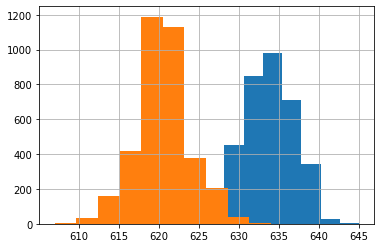

In [26]:
d.lidar.get_group(6).hist()     ###two_mode_hist###
d.lidar.get_group(14).hist()
plt.show()

### 2.4.2 同時確率と加法定理，乗法定理

In [27]:
each_hour = { i : d.lidar.get_group(i).value_counts().sort_index()  for i in range(24)} #時間ごとにデータフレームを作成  ###calc_joint_probs
freqs = pd.concat(each_hour, axis=1) #concatで連結
freqs = freqs.fillna(0)     #欠損値(NaN)を0で埋める
probs = freqs/len(data) #頻度を確率で

probs #表示

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000,0.000000
609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000
610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000036,0.000049,0.000000,0.000000,0.000012,0.000012,0.000134,0.000000,0.000000,0.000000
611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000146,0.000122,0.000000,0.000000,0.000000,0.000024,0.000073,0.000146,0.000049,0.000000
612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000219,0.000316,0.000000,0.000036,0.000036,0.000061,0.000255,0.000194,0.000024,0.000012
613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000620,0.000644,0.000024,0.000182,0.000061,0.000219,0.000680,0.000437,0.000109,0.000024
615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001300,0.001045,0.000024,0.000207,0.000267,0.000377,0.000984,0.001021,0.000474,0.000049
616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001956,0.001810,0.000219,0.000595,0.000595,0.001021,0.001725,0.001397,0.000595,0.000085
617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003111,0.002928,0.000510,0.001264,0.000923,0.001640,0.002211,0.002296,0.001021,0.000146


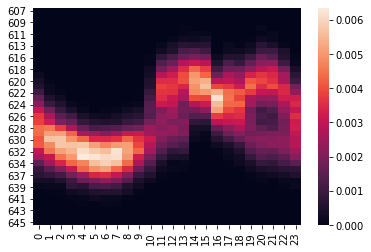

In [28]:
import seaborn as sns   ###2d_hist （下のセルも）

sns.heatmap(probs)
plt.show()

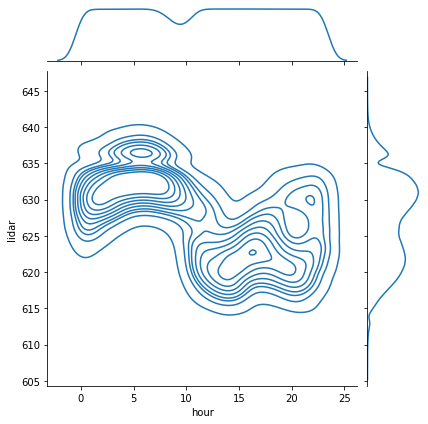

In [29]:
sns.jointplot(data["hour"], data["lidar"], data, kind="kde")
plt.show()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.043013,0.042916,0.042879,0.042916,0.042964,0.043037,0.043061,0.043001,0.038712,0.028651,...,0.043183,0.043122,0.043061,0.043122,0.043049,0.043086,0.043159,0.042976,0.043049,0.043037


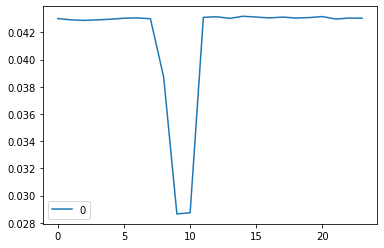

In [30]:
p_t = pd.DataFrame(probs.sum())   #各列を合計   
p_t.plot()
p_t.transpose() #紙面の関係で表を横並びに

In [31]:
p_t.sum()    # 1になる

0    1.0
dtype: float64

,607,608,609,610,611,612,613,615,616,617,...,636,637,638,639,640,641,642,643,644,645
0,0.000012,0.000049,0.000061,0.000328,0.00068,0.00158,0.004241,0.007752,0.013852,0.022053,...,0.03537,0.02226,0.012819,0.006671,0.002989,0.000996,0.000401,0.000109,0.000024,0.000012


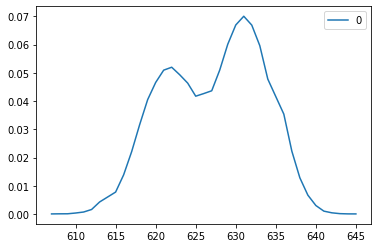

In [32]:
p_z = pd.DataFrame(probs.transpose().sum())        #行と列を転置して各列を合計
p_z.plot()
p_z.transpose()

In [33]:
p_z.sum()

0    1.0
dtype: float64

In [34]:
cond_z_t = probs/p_t[0]  #列（時間）ごとにP(t)で割るとP(x|t)となる   ###lidar600cond
cond_z_t

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000282,0.000283,0.000000,0.000000
609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000283,0.000282,0.000000
610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000844,0.001127,0.000000,0.000000,0.000282,0.000282,0.003097,0.000000,0.000000,0.000000
611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003376,0.002818,0.000000,0.000000,0.000000,0.000564,0.001689,0.003393,0.001129,0.000000
612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005065,0.007326,0.000000,0.000845,0.000847,0.001410,0.005912,0.004524,0.000564,0.000282
613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014350,0.014934,0.000564,0.004227,0.001411,0.005076,0.015766,0.010178,0.002540,0.000565
615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.030107,0.024232,0.000564,0.004790,0.006209,0.008742,0.022804,0.023749,0.011008,0.001129
616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.045301,0.041984,0.005079,0.013807,0.013830,0.023689,0.039977,0.032513,0.013830,0.001976
617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.072032,0.067906,0.011851,0.029304,0.021451,0.038071,0.051239,0.053435,0.023709,0.003388


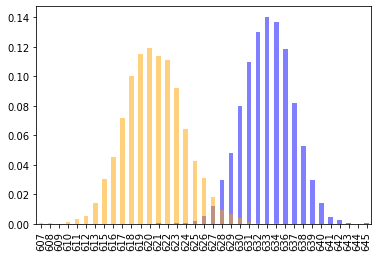

In [35]:
(cond_z_t[6]).plot.bar(color="blue", alpha=0.5)  ###lidar600pxt###
(cond_z_t[14]).plot.bar(color="orange", alpha=0.5) 
plt.show()

### 2.4.5 ベイズの定理

In [36]:
cond_t_z = probs.transpose()/probs.transpose().sum() #行と列を入れ替えて同様に計算するとP(t|z)となる  ###lidar600bayes1

print("P(z=630) = ", p_z[0][630]) #センサ値が630になる確率（何時かの情報はない）
print("P(t=13) = ", p_t[0][13]) #時間が13時である確率
print("P(t=13 | z = 630) = ", cond_t_z[630][13])
print("Bayes P(z=630 | t = 13) = ", cond_t_z[630][13]*p_z[0][630]/p_t[0][13])

print("answer P(z=630 | t = 13) = ", cond_z_t[13][630]) #13時にセンサ値が630

P(z=630) =  0.06694936878045224
P(t=13) =  0.043024993620976656
P(t=13 | z = 630) =  0.023230490018148822
Bayes P(z=630 | t = 13) =  0.036147980796385204
answer P(z=630 | t = 13) =  0.036147980796385204


In [37]:
def bayes_estimation(sensor_value, current_estimation):  ###lidar600bayes2
    new_estimation = []
    for i in range(24):
        new_estimation.append(cond_z_t[i][sensor_value]*current_estimation[i])
        
    return new_estimation/sum(new_estimation) #正規化

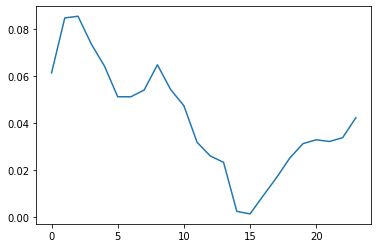

In [38]:
estimation = bayes_estimation(630, p_t[0])  ###lidar600bayesonestep
plt.plot(estimation)

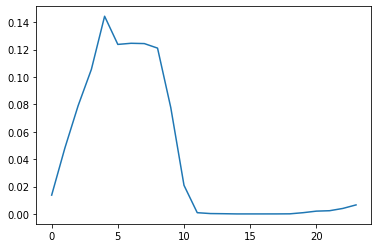

In [39]:
values_5 = [630,632,636] #sensor_data_600.txtから拾ってきた5時台のセンサ値        ###lidar600bayesestm1

estimation = p_t[0]
for v in values_5:
    estimation = bayes_estimation(v, estimation)
    
plt.plot(estimation)

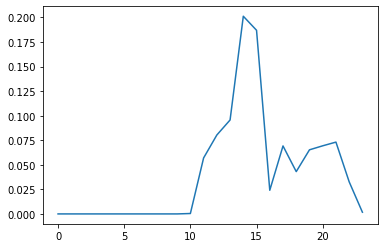

In [40]:
values_11 = [617,624,619] #sensor_data_600.txtから拾ってきた11時台のセンサ値        ###lidar600bayesestm2

estimation = p_t[0]
for v in values_11:
    estimation = bayes_estimation(v, estimation)
    
plt.plot(estimation)

## 2.5 多次元のガウス分布

### 2.5.1 2次元ガウス分布の当てはめ

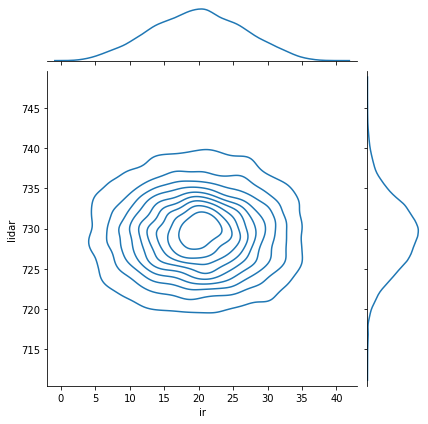

In [41]:
import pandas as pd    ###2dgauss###
import seaborn as sns
import matplotlib.pyplot as plt

data  = pd.read_csv("sensor_data_700.txt", delimiter=" ", 
                    header=None, names = ("date","time","ir","lidar"))

d = data[ (data["time"] < 160000) & (data["time"] >= 120000) ] #12時から16時までのデータだけ抽出
d = d.loc[:, ["ir", "lidar"]]

sns.jointplot(d["ir"], d["lidar"], d, kind="kde")
plt.show()

In [42]:
print("光センサの計測値の分散:", d.ir.var()) ###coveach###
print("LiDARの計測値の分散:", d.lidar.var())

diff_ir = d.ir - d.ir.mean()
diff_lidar = d.lidar - d.lidar.mean()
    
a = diff_ir * diff_lidar
print("共分散:", sum(a)/(len(d)-1))

d.mean()

光センサの計測値の分散: 42.117126367701594
LiDARの計測値の分散: 17.702026469211457
共分散: -0.31677803385436953


ir        19.860247
lidar    729.311958
dtype: float64

In [43]:
d.cov() ###covonce###

,ir,lidar
ir,42.117126,-0.316778
lidar,-0.316778,17.702026


In [44]:
from scipy.stats import multivariate_normal   ###multivariatenormal###

irlidar = multivariate_normal(mean=d.mean().values.T, cov=d.cov().values)

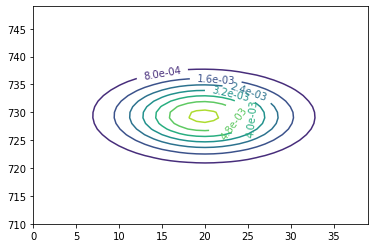

In [45]:
import numpy as np                ###contour###
 
x, y = np.mgrid[0:40, 710:750]     #2次元平面に均等にX座標、Y座標を作る
pos = np.empty(x.shape + (2,))     #xは40x40の2次元リストで、これに3次元目を加えて40x40x2のリストを作成
pos[:, :, 0] = x                                   #加えた3次元目にx,yを代入
pos[:, :, 1] = y
cont = plt.contour(x, y, irlidar.pdf(pos)) #x, y座標と、それに対応する密度を算出
cont.clabel(fmt='%1.1e')                         #等高線に値を書き込むためのフォーマット指定

plt.show()   #描画

In [46]:
print("X座標:", x)   ###grid###
print("Y座標:", y)

X座標: [[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]
 ...
 [37 37 37 ... 37 37 37]
 [38 38 38 ... 38 38 38]
 [39 39 39 ... 39 39 39]]
Y座標: [[710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 ...
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]]


### 2.5.2 共分散の意味

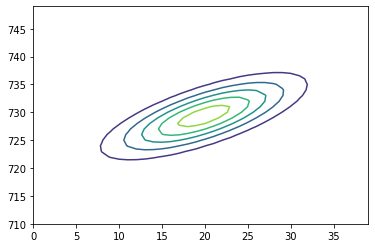

In [47]:
c = d.cov().values + np.array([[0, 20], [20,0]])    ###covadd###
tmp = multivariate_normal(mean=d.mean().values.T, cov=c)
cont = plt.contour(x, y, tmp.pdf(pos)) 
plt.show() 

In [48]:
import pandas as pd         ###multigauss2（ノートブック全部）###
import seaborn as sns
import matplotlib.pyplot as plt

data  = pd.read_csv("sensor_data_200.txt", delimiter=" ", 
                    header=None, names = ("date","time","ir","lidar"))

d = data.loc[:, ["ir", "lidar"]] #光センサとLiDARのデータだけにする

,ir,lidar
ir,109.394583,-13.444661
lidar,-13.444661,23.408107


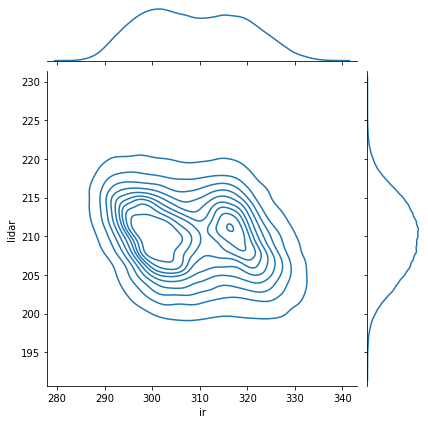

In [49]:
sns.jointplot(d["ir"], d["lidar"], d, kind="kde") #度数分布を描画
d.cov()                                                                    #分散、共分散を計算

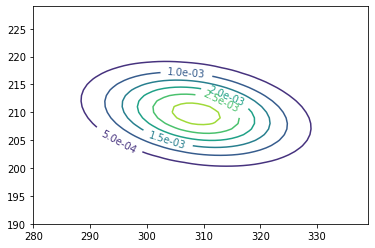

In [50]:
import numpy as np  
from scipy.stats import multivariate_normal
 
x, y = np.mgrid[280:340, 190:230]   
pos = np.empty(x.shape + (2,)) 
pos[:, :, 0] = x   
pos[:, :, 1] = y
 
irlidar = multivariate_normal(mean=d.mean().values.T, cov=d.cov().values) #2次元ガウス分布を作る
cont = plt.contour(x, y, irlidar.pdf(pos)) #密度の値の等高線を作る
cont.clabel(fmt='%1.1e')                          #等高線に値の文字列を入れる

plt.show()

### 2.5.3 共分散行列と誤差楕円

Text(0, 0.5, 'y')

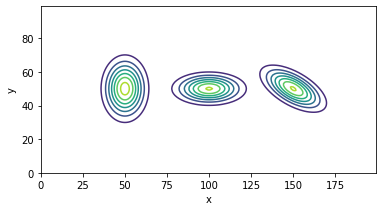

In [51]:
%matplotlib inline 
import matplotlib.pyplot as plt ###variousgauss###
import numpy as np                  
from scipy.stats import multivariate_normal 
import math

x, y = np.mgrid[0:200, 0:100]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x 
pos[:, :, 1] = y

a = multivariate_normal(mean=[50,50], cov=[[50, 0], [0, 100]])
b = multivariate_normal(mean=[100,50], cov=[[125, 0], [0, 25]])
c = multivariate_normal(mean=[150,50], cov=[[100, -25*math.sqrt(3)], [-25*math.sqrt(3), 50]])

for e in [a,b,c]:
    plt.contour(x, y, e.pdf(pos)) 

plt.gca().set_aspect('equal') #gca: 図を管理しているAxisというオブジェクトを返す
plt.gca().set_xlabel('x')
plt.gca().set_ylabel('y')

In [52]:
eig_vals, eig_vec = np.linalg.eig(c.cov) ###eigen###

print("eig_vals: ", eig_vals)
print("eig_vec: ", eig_vec)
print("固有ベクトル1: ", eig_vec[:,0])   #eig_vecの縦の列が固有ベクトルに対応
print("固有ベクトル2: ", eig_vec[:,1])

eig_vals:  [125.  25.]
eig_vec:  [[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]
固有ベクトル1:  [ 0.8660254 -0.5      ]
固有ベクトル2:  [0.5       0.8660254]


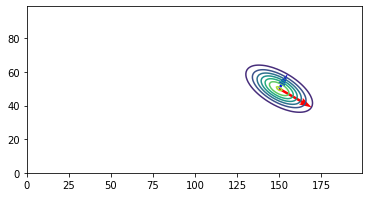

In [53]:
plt.contour(x, y, c.pdf(pos))     ###draweigen###

v = 2*math.sqrt(eig_vals[0])*eig_vec[:,0]
plt.quiver(c.mean[0], c.mean[1], v[0], v[1], color="red", angles='xy', scale_units='xy', scale=1)

v = 2*math.sqrt(eig_vals[1])*eig_vec[:,1]
plt.quiver(c.mean[0], c.mean[1], v[0], v[1], color="blue", angles='xy', scale_units='xy', scale=1)

plt.gca().set_aspect('equal')
plt.show()

In [54]:
V = eig_vec   #eig_vecには固有ベクトルが並んでいるのでそのまま使える  ###eigenmatrix###
L = np.diag(eig_vals)  #np.diagで対角行列を作成

print("分解したものを計算:\n", V.dot(L.dot(np.linalg.inv(V))))
print("元の共分散行列:\n", np.array([[100, -25*math.sqrt(3)], [-25*math.sqrt(3), 50]]))

分解したものを計算:
 [[100.         -43.30127019]
 [-43.30127019  50.        ]]
元の共分散行列:
 [[100.         -43.30127019]
 [-43.30127019  50.        ]]
